### prototyping SEFL A day freezing.
The population data is in `ptsd_is_interval_freezing_all.ipynb` notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
freezing = '/gdrive/Shareddrives/TuriLab/Data/PTSD_project/PTSD8/PTSD8_shockboxes/ptsd8_sefla/export/freeze_ptsd8_sefla_12_21_1s.csv'
stim_pattern = '/gdrive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/shock_series_bool.csv'

In [ ]:
freez_df = pd.read_csv(freezing, delimiter=',')
freez_df.head()

,% freeze,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 3568,Unnamed: 3569,Unnamed: 3570,Unnamed: 3571,Unnamed: 3572,Unnamed: 3573,Unnamed: 3574,Unnamed: 3575,Unnamed: 3576,Unnamed: 3577,Unnamed: 3578,Unnamed: 3579,Unnamed: 3580,Unnamed: 3581,Unnamed: 3582,Unnamed: 3583,Unnamed: 3584,Unnamed: 3585,Unnamed: 3586,Unnamed: 3587,Unnamed: 3588,Unnamed: 3589,Unnamed: 3590,Unnamed: 3591,Unnamed: 3592,Unnamed: 3593,Unnamed: 3594,Unnamed: 3595,Unnamed: 3596,Unnamed: 3597,Unnamed: 3598,Unnamed: 3599,Unnamed: 3600,Unnamed: 3601,Unnamed: 3602,Unnamed: 3603,Unnamed: 3604,Unnamed: 3605,Unnamed: 3606,Unnamed: 3607
0,Onset,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,3567.0,3568.0,3569.0,3570.0,3571.0,3572.0,3573.0,3574.0,3575.0,3576.00,3577.0,3578.0,3579.0,3580.0,3581.0,3582.0,3583.0,3584.0,3585.0,3586.0,3587.0,3588.0,3589.0,3590.0,3591.0,3592.00,3593.0,3594.0,3595.0,3596.0,3597.0,3598.0,3599.00,NaN,Threshold,NaN,Bout duration,NaN,Protocol,NaN
1,Duration,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,923-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,41.67,NaN,1.00,NaN,10randShock,NaN
3,923-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.67,100.0,100.0,100.0,100.0,75.0,25.0,100.0,100.0,100.0,75.0,100.0,100.0,50.0,100.0,100.0,66.67,0.0,0.0,0.0,0.0,0.0,75.0,33.33,NaN,50.00,NaN,NaN,NaN,10randShock,NaN
4,917-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,29.17,NaN,NaN,NaN,10randShock,NaN


In [ ]:
new_header = freez_df.T.iloc[0] #grab the first row for the header
# some id has some whie space before it. this gets rid of that
header2 = []
for i in new_header:
  header2.append(i.strip())
df = freez_df.T[1:] #take the data less the header row
df.columns = header2 #set the header row as the df header
df.reset_index(inplace=True)
df.head()

,index,Onset,Duration,923-1,923-5,917-1,923-2,923-4,917-2,917-3
0,Unnamed: 1,0,1,0,0,0,0,0,0,0
1,Unnamed: 2,1,1,0,0,0,0,0,0,0
2,Unnamed: 3,2,1,0,0,0,0,0,0,0
3,Unnamed: 4,3,1,0,0,0,0,0,0,0
4,Unnamed: 5,4,1,0,0,0,0,0,0,0


In [ ]:
df.drop(['Onset', 'Duration', 'index'], axis=1, inplace=True)
df.head()

,923-1,923-5,917-1,923-2,923-4,917-2,917-3
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
# dropping the last rows, and converting numbers to float
df = df[:-7]
df = df.astype(float)

In [ ]:
df.dtypes

923-1    float64
923-5    float64
917-1    float64
923-2    float64
923-4    float64
917-2    float64
917-3    float64
dtype: object

In [ ]:
df.head()

,923-1,923-5,917-1,923-2,923-4,917-2,917-3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['condition'] = pd.Series.empty

In [ ]:
df['condition'][:292] = "pre"
df['condition'][292:727] = "shock01"
df['condition'][727:1028] = "shock02"
df['condition'][1028:1385] = "shock03"
df['condition'][1385:1673] = "shock04"
df['condition'][1673:1922] = "shock05"
df['condition'][1922:2332] = "shock06"
df['condition'][2332:2595] = "shock07"
df['condition'][2595:3018] = "shock08"
df['condition'][3018:3376] = "shock09"
df['condition'][3376:] = "shock10"


In [ ]:
df.tail()

,923-1,923-5,917-1,923-2,923-4,917-2,917-3,condition
3574,0.0,0.00,0.0,100.0,100.0,100.0,100.0,shock10
3575,0.0,0.00,0.0,100.0,100.0,100.0,100.0,shock10
3576,0.0,66.67,0.0,100.0,100.0,100.0,100.0,shock10
3577,0.0,100.00,0.0,100.0,100.0,100.0,50.0,shock10
3578,0.0,100.00,0.0,100.0,100.0,100.0,100.0,shock10


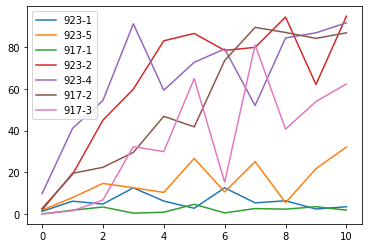

In [ ]:
df.groupby('condition', as_index=False).mean().plot()

In [ ]:
mean_df = df.groupby('condition', as_index=False).mean()

In [ ]:
mean_df

,condition,923-1,923-5,917-1,923-2,923-4,917-2,917-3
0,pre,1.227158,1.769418,0.000000,2.597021,9.703185,1.855034,0.000000
1,shock01,6.111126,7.816115,1.762460,18.965494,41.053724,19.501908,1.494253
2,shock02,4.734252,14.645615,3.322259,45.016611,54.512757,22.369867,6.644518
3,shock03,12.535014,12.581737,0.350140,59.943950,91.316527,29.551821,32.306303
4,shock04,6.163194,10.329826,0.810174,83.159687,59.403924,46.875035,29.948021
5,shock05,2.710843,26.673333,4.618474,86.680080,72.824618,41.800643,64.993253
6,shock06,12.540659,10.569122,0.487805,78.556927,79.248024,73.678902,15.243927
7,shock07,5.323194,25.126730,2.566540,80.006388,52.091255,89.607110,81.210380
8,shock08,6.304184,5.417660,2.285248,94.562648,84.535059,87.155248,40.721017
9,shock09,2.351006,21.717849,3.468324,62.174134,86.987905,84.311034,53.957151


## converting the data to longform for plotting with seaborn. you need to append the new mice to this

In [ ]:
melted_df = pd.melt(mean_df, id_vars=['condition'],
                    value_vars=mean_df.columns[1:])

In [ ]:
melted_df

,condition,variable,value
0,pre,923-1,1.227158
1,shock01,923-1,6.111126
2,shock02,923-1,4.734252
3,shock03,923-1,12.535014
4,shock04,923-1,6.163194
...,...,...,...
72,shock06,917-3,15.243927
73,shock07,917-3,81.210380
74,shock08,917-3,40.721017
75,shock09,917-3,53.957151
